<div class="alert alert-block alert-warning">
    <h1><center> Crisp Data Mining (CRISP-DM) : DATA UNDERSTANDING  </center></h1>

## Introduction

 _data understanding_ and  _data preparation_ stages of the Crisp Data Mining (CRISP-DM) model, foorming the basis for the modeling phase of the data mining process
 
 The questions to be answered: 

- Is the data quality sufficient?
- How can we check the data for problems?
- How do we have to clean the data?
- How is the data best transformed for modeling?

In this code I check the validity of data and familiarize myself with a dataset 
 
------------

### Packages 

In [1]:
# --- Libraries ---
import pandas as pd # for data manipulation
import matplotlib.pyplot as plt # for plotting
import numpy as np #for numeric calculations and making simulated data.
import seaborn as sns # for plotting, an extension on matplotlib 

# - sklearn has many data analysis utility functions like scaling as well as a large variety of modeling tools.
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import scale
from sklearn.manifold import TSNE

# This forces plots to be shown inline in the notebook
%matplotlib inline

##  <font color = dimgrey> 1. Introduction to the dataset </font>

The data gathered on hospital patients with and without cardiovascular disease, depicted by the target variable **_cardio_**, a common disease associated with a buildup of fatty deposits inside the arteries (blood vessels) of the heart. 
 
 -------
The features/variables have been retrieved from different sources: 
- doctors notes (texts)
- examination variables that have come from a database containing lab results or taken during a doctors examination
- self reported variables

--------------
The data has the following columns/attributes:

| Feature | Type | Explanation |
| :- | :- | :-
| age | numeric | The age of the patient in days 
| sex | binary | Male/Female
| weight | numeric | Measured weight of the patient (cm)
| height | numeric | Measured weight of the patient (kg)
| ap_hi | numeric | Measured Systolic blood pressure
| ap_lo | numeric | Measured Diastolic blood pressure
| smoke | binary | A subjective feature based on asking the patient whether or not he/she smokes
| active | binary |  A subjective feature based on asking the patient whether or not he/she exercises regularly
| cholesterol | categorical | Cholesterol associated risk information evaluated by a doctor
| cardio | binary | Whether or not the patient has been diagnosed with cardiac disease.

-----------
#### ***Reading data*** 

---------------

In [7]:

data_path = "cardiovascular_disease_data_ex_1.csv" 
data = pd.read_csv(data_path, dtype = {'age': 'int', 'height': 'int', 'weight':'int', 'ap_lo':'int', 'ap_hi':'int', 'sex': 'boolean', 'smoke': 'boolean',
       'active':'boolean', 'cardio':'boolean', 'cholesterol':'category'}) 

---------
***1 a)***
1. Printing out the first five rows of the data.

2. Saving the feature names to lists by their types: make three lists named **numeric_features**, **binary_features** and **categorical_features**, containing the **names** of the features of each corresponding type.

_Saving the feature names to a list or lists and using them to subset prevents typing errors and avoids repetition_

In [8]:
print(data.head(5)) # printing first 5 rows

# putting numeric features in a seperated variable
numeric_features = data.select_dtypes('int')

# putting binary features in a seperated variable
binary_features = data.select_dtypes('boolean')

# putting categorical features in a seperated variable
categorical_features = data.select_dtypes('category')

     age    sex  height  weight  ap_hi  ap_lo  smoke  active  cardio  \
0  19797  False     161      55    102     68  False    True   False   
1  22571   True     178      68    120     70  False   False   False   
2  16621   True     169      69    120     80  False    True   False   
3  16688  False     156      77    120     80  False    True   False   
4  19498   True     170      98    130     80   True    True    True   

  cholesterol  
0    elevated  
1      normal  
2      normal  
3      normal  
4    elevated  


_________
## 2. Checking data quality
    
Often in data analysis projects the data has not been gathered exclusively for the data analysis only but originally for other reasons. Because of this, the features are most often not nicely formatted and may have mistakes. It is very important to first check the data for possible mistakes as they can make all the conclusions.


----------
***2 a)***  Printing out the data types of dataset

In [9]:
data.dtypes #printing data types in our dataset

age               int64
sex             boolean
height            int64
weight            int64
ap_hi             int64
ap_lo             int64
smoke           boolean
active          boolean
cardio          boolean
cholesterol    category
dtype: object

--------
***2 b)***  


In [10]:
data.describe() # printing description of the whole data

,age,height,weight,ap_hi,ap_lo
count,210.000000,210.000000,210.000000,210.000000,210.000000
mean,19455.504762,164.180952,73.895238,127.857143,81.814286
std,2429.010199,7.534648,14.612326,17.508947,9.947652
min,14367.000000,142.000000,45.000000,90.000000,50.000000
25%,17635.750000,158.000000,64.000000,120.000000,80.000000
50%,19778.000000,164.000000,70.000000,120.000000,80.000000
75%,21230.500000,170.000000,81.000000,140.000000,90.000000
max,23565.000000,195.000000,125.000000,190.000000,120.000000


<font color=red> We only got the numeric data. Statistics like mean and std can be defined only for numeric data. </font>

----------
***2 d)*** Calculating descriptives for the binary (boolean) features and the categorical feature <br>

In [11]:
print(binary_features.describe()) # printing description of binary features

          sex  smoke active cardio
count     210    210    210    210
unique      2      2      2      2
top     False  False   True  False
freq      129    186    162    105


In [12]:
print(categorical_features.describe()) # printing description of categorical features

       cholesterol
count          210
unique           4
top         normal
freq           153


In [13]:
# calculating  portion of each category and the number of samples including category
# For binary features
for col in binary_features.columns:
    v_counts = binary_features[col].value_counts().to_list()
    print(col, ' ', 'value counts: ', 'False: ',v_counts[0], 'True: ', v_counts[1])
    print('\t False Portion: ', round(v_counts[0]/len(binary_features[col]),4), '\tTrue Portion: ',
          round(v_counts[1]/len(binary_features[col]),4), end='\n\n')


sex   value counts:  False:  129 True:  81
	 False Portion:  0.6143 	True Portion:  0.3857

smoke   value counts:  False:  186 True:  24
	 False Portion:  0.8857 	True Portion:  0.1143

active   value counts:  False:  162 True:  48
	 False Portion:  0.7714 	True Portion:  0.2286

cardio   value counts:  False:  105 True:  105
	 False Portion:  0.5 	True Portion:  0.5



In [14]:
# calculating  portion of each category and the number of samples including category
# For categorical features
for col in categorical_features.columns:
    v_counts = categorical_features[col].value_counts().to_dict()
    print(col, ' ', 'value counts: ')
    for key , value in v_counts.items():
        print( key,': ',value)
        print( key, ' Portion: ', round(value/len(categorical_features[col]),4), end='\n\n')

cholesterol   value counts: 
normal :  153
normal  Portion:  0.7286

at risk :  35
at risk  Portion:  0.1667

elevated :  21
elevated  Portion:  0.1

elev ated :  1
elev ated  Portion:  0.0048



<font color = red> ***--- The datatype 'Mean' will be equal to the Fraction. Also, Median will be the Top value.

We can assign min and max to the features as well. Max is the top and Min is the value that is not Top. ---*** </font>


-----------------------
## 3. Plotting numeric features
Descriptives don't really give a full or intuitive picture of the distribution of features. I make use of different plots to check the data quality.  

----------
***3 a)*** 


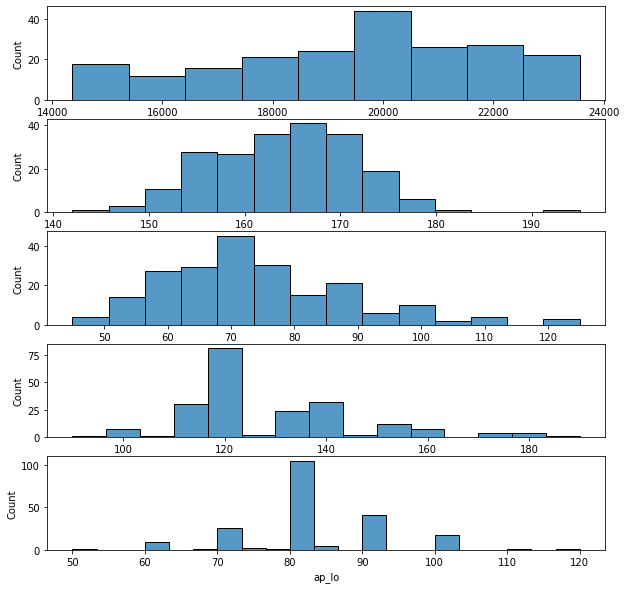

In [16]:
numeric_plot_titles = list(numeric_features) # creating a list of numeric features' names
features_length = len(numeric_plot_titles) # calculating number of features
fig, axes = plt.subplots(features_length,1, figsize = (10,10)) # creating subplots as many as features

# creating a histogram for each plot
for j, num_data in enumerate(numeric_features): 
    sns.histplot(data = numeric_features[num_data], ax = axes[j]) 

_______
## 4. Plotting binary and categorical features

***4 a)*** Plotting **barplots** for each of the non-numeric features, Using fractions instead of the real frequencies of the levels of these features.

--------------

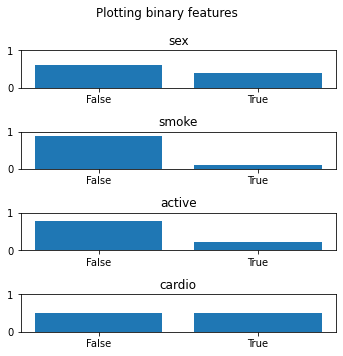

In [17]:
binary_plot_titles = list(binary_features)# creating a list of binary features' names
fig, axes = plt.subplots(4,1, figsize = (5,5)) # creating a 4 subplots in a fig with size 5*5

# creating two bars (True and False) for each binary feature
for j, bin_data in enumerate(binary_features): 
    v_counts = binary_features[bin_data].value_counts().to_list()
    axes[j].bar(x = ["False","True"], height = [v_counts[0]/len(binary_features[bin_data])
                                                , v_counts[1]/len(binary_features[bin_data]) ])
    # setting a title for each plot
    axes[j].set_title(binary_plot_titles[j])
    
    # setting the y axes from 0 to 1 for each subplot
    axes[j].set_ylim((0,1))

# setting a subtitle for the whole fig
fig.suptitle("Plotting binary features")
plt.tight_layout()

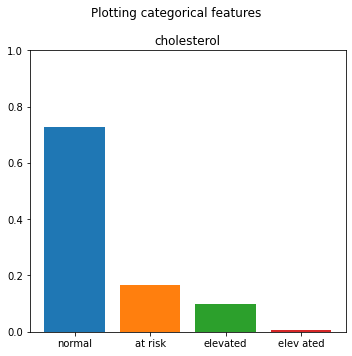

In [18]:
categorical_plot_titles = list(categorical_features) # creating a list of categorical features' names
fig, axes = plt.subplots(1, figsize = (5,5)) # creating a plot with size 5*5
 
v_counts = categorical_features.value_counts().to_dict() #creating a dictionary of value counts and names

# calculating the portion of each category and drawing its bar
for key, value in v_counts.items():
    axes.bar(x = key, height = value/len(categorical_features[categorical_plot_titles[0]]))

# setting a title for the plot
axes.set_title(categorical_plot_titles[0])

# setting the y axes from 0 to 1
axes.set_ylim((0,1))

# setting a subtitle for the fig
fig.suptitle("Plotting categorical features")
plt.tight_layout()

**4 b)** 
Droping the 'elev ated' column of categorical features, the original one is 'elevated'

In [19]:
# droping the 'elev ated' column of categorical features, the original one is 'elevated'
categorical_features['cholesterol'] = categorical_features['cholesterol'].cat.remove_categories('elev ated')

/home/maryamt/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


-------------

## 5. Preprocessing numeric features

Scaling the data improves the performance of machine learning algorithms in many cases, or perhaps better put, can ruin performance if not done. For instance with distance based algorithms covered in the course such as PCA, T-SNE and KNN some features with large values can dominate the distance calculations. 

-----------
Let's look at two ways of bringing the values to the same scale: **min-max scaling to [0,1]** and **standardizing the features to 0 mean and unit variance** , using sklearn.minmax_scale and sklearn.scale 
__________________________



**5 a)** Min-max

In [20]:
# scaling numeric features between 0 and 1 while making a copy and keeping the columns' names
data_min_maxed = pd.DataFrame(minmax_scale(numeric_features,feature_range=(0, 1),copy=True),columns=numeric_features.columns)
data_min_maxed

,age,height,weight,ap_hi,ap_lo
0,0.590346,0.358491,0.1250,0.12,0.257143
1,0.891933,0.679245,0.2875,0.30,0.285714
2,0.245053,0.509434,0.3000,0.30,0.428571
3,0.252337,0.264151,0.4000,0.30,0.428571
4,0.557839,0.528302,0.6625,0.40,0.428571
...,...,...,...,...,...
205,0.246032,0.301887,0.1250,0.30,0.428571
206,0.258208,0.528302,0.2875,0.20,0.285714
207,0.951294,0.283019,0.4125,0.10,0.142857
208,0.094477,0.207547,0.1250,0.30,0.428571


**5 b)** Standardize numeric attributes to 0 mean and unit variance

In [21]:
# standardalizing numeric features while making a copy and keeping the columns' names
data_standardized = pd.DataFrame(scale(numeric_features, with_mean=True, copy=True),columns=numeric_features.columns)
data_standardized

,age,height,weight,ap_hi,ap_lo
0,0.140926,-0.423185,-1.296193,-1.480325,-1.392016
1,1.285684,1.838449,-0.404407,-0.449822,-1.190484
2,-1.169727,0.641113,-0.335808,-0.449822,-0.182819
3,-1.142077,-1.088372,0.212983,-0.449822,-0.182819
4,0.017537,0.774151,1.653560,0.122679,-0.182819
...,...,...,...,...,...
205,-1.166013,-0.822297,-1.296193,-0.449822,-0.182819
206,-1.119793,0.774151,-0.404407,-1.022324,-1.190484
207,1.511004,-0.955335,0.281582,-1.594825,-2.198148
208,-1.741280,-1.487484,-1.296193,-0.449822,-0.182819


**5 c)** Boxplots of the 'age' feature, one plot with the data_min_maxed and one with the data_standardized

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc88bd98da0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc88bd98080>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc88bede7b8>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc88be24c88>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc88be24518>],
 'means': []}

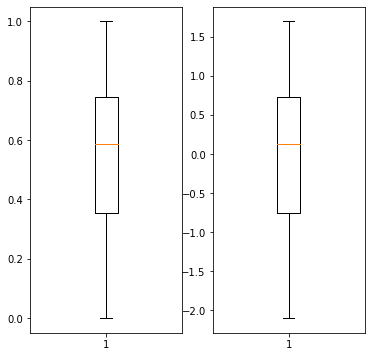

In [22]:
# creating 2 subplots in a row, beside each other
fig, axes = plt.subplots(1,2,figsize=(6,6))

# drawing boxplots for each sunplot
axes[0].boxplot(data_min_maxed['age'])
axes[1].boxplot(data_standardized['age'])


---------

Lets see the differences of these preprocessing methods through an outlier example.  

--------------------

***5d)***


In [23]:
### Add an outlier
data_w_outlier = data.copy() 
data_w_outlier.loc[data.shape[0] -1 , 'age'] = 150 
age_w_outlier = data_w_outlier.age

In [24]:
# creating age_w_outlier_minmaxed
age_w_outlier_minmaxed = minmax_scale(age_w_outlier,feature_range=(0, 1),copy=True)

# creating age_w_outlier_standardized
age_w_outlier_standardized =  scale(age_w_outlier, with_mean=True, copy=True)

***Plotting***

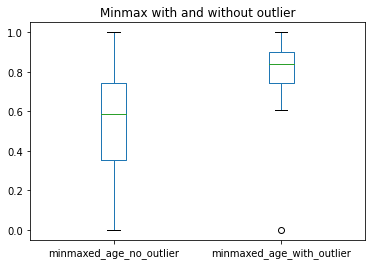

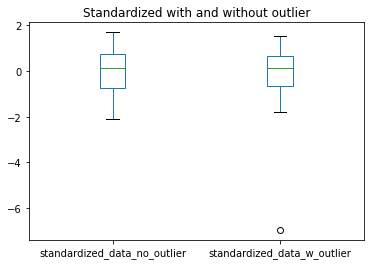

In [25]:
# Wrap of two features - the age feature without the outlier, and the age feature with it, min-maxed.
minmaxed_datas = pd.DataFrame({"minmaxed_age_no_outlier" : data_min_maxed.age, 
              "minmaxed_age_with_outlier": age_w_outlier_minmaxed })

# Wrap of two features - the age feature without the outlier, and the age feature with it, standardized. 
standardized_datas = pd.DataFrame({"standardized_data_no_outlier" : data_standardized.age, 
              "standardized_data_w_outlier": age_w_outlier_standardized })

axes_minmaxed = minmaxed_datas[['minmaxed_age_no_outlier', 'minmaxed_age_with_outlier']].plot(kind='box', title='Minmax with and without outlier')
axes_std = standardized_datas[['standardized_data_no_outlier', 'standardized_data_w_outlier']].plot(kind='box', title='Standardized with and without outlier')

----------
**5 f)Conclusion**: 


<font color = red>
 1. Min-Max has a specific range and all data will be between 0 and 1. Output cannot be negative. Standardalized does not have a specific range and data can be negative. But it has a specific distribution (normal distribution) and mean is equal to 0. 

2.These are preprocessing methods and we need to use them before training a network. The network might be sensitive to negative inputs or does not accept them. In this case we need to use min-max method. Also the network might need a normal distribution, in this case we can use standardalized data.
</font>

---------------
## 6. Preprocessing categorical features



We can roughly divide categorical variables/features to two types:  ***nominal categorical***  and  ***ordinal categorical*** variables/features. Some cases are clear in terms of which of the two a feature falls into. For example nationality is not an ordered feature, but which grade in school someone is has a natural ordering. Here **One-hot encoding** is used.

-----
***Nominal categorical features need to be encoded***, because not encoding them implies that they have an order.

***Ordinal categorical features do not necessarily need to be encoded***, but there are cases where it can be wise, like when its not clear that thy are equal in distance from each other. When unsure, it may also be better to one-hot encode.  

---------------------


**6 a)** One-hot-encode for the cholesterol-feature and adding the one-hot features to the data.

In [26]:
from sklearn.preprocessing import OneHotEncoder

# saving categories of cholerstrol level
cols = categorical_features[col].value_counts().to_dict().keys()

# creatinng one hot encoder for cholestrol
categorical_encoded = OneHotEncoder().fit_transform(categorical_features).toarray()

# we have 3 levels, deleting the last one
categorical_encoded = categorical_encoded[:,0:3]

# naming the columns
categorical_encoded = pd.DataFrame(categorical_encoded, columns=cols)

# adding it to data
data = data.join(categorical_encoded)

#printing the first rows
data.head()

,age,sex,height,weight,ap_hi,ap_lo,smoke,active,cardio,cholesterol,normal,at risk,elevated
0,19797,False,161,55,102,68,False,True,False,elevated,0.0,1.0,0.0
1,22571,True,178,68,120,70,False,False,False,normal,0.0,0.0,1.0
2,16621,True,169,69,120,80,False,True,False,normal,0.0,0.0,1.0
3,16688,False,156,77,120,80,False,True,False,normal,0.0,0.0,1.0
4,19498,True,170,98,130,80,True,True,True,elevated,0.0,1.0,0.0


----------